# ACTIVIDAD 1

In [1]:
# import
!pip install jupyter==1.0.0
!pip install pandas==1.5.3
!pip install geopandas==0.12.2
!pip install matplotlib==3.7.1
!pip install keplergl==0.3.2
!pip install pyrosm==0.6.1
!pip install rtree==1.0.1
!pip install numpy==1.23.5
!pip install shapely==1.8.5
!pip install contextily==1.3.0
!pip install folium==0.14.0
!pip install mapclassify==2.5.0


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 34.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 32.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 29.8 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.6 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 15.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 17.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 14.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 4.6 MB/s eta 0:00:

In [2]:
from pyrosm import get_data
# Download data for the city of Madrid
fp = get_data("Madrid")
print(fp)

/home/milagros/Documents/UE/BI/GIS_Act1/venv/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


Downloaded Protobuf data 'Madrid.osm.pbf' (40.61 MB) to:
'/tmp/pyrosm/Madrid.osm.pbf'
/tmp/pyrosm/Madrid.osm.pbf


1. Cargar como GeoDataFrame datos sobre Puntos de Interés de OSM para Madrid

/home/milagros/Documents/UE/BI/GIS_Act1/venv/lib/python3.10/site-packages/pyrosm/pyrosm.py:576: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_poi_data(
/home/milagros/Documents/UE/BI/GIS_Act1/venv/lib/python3.10/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


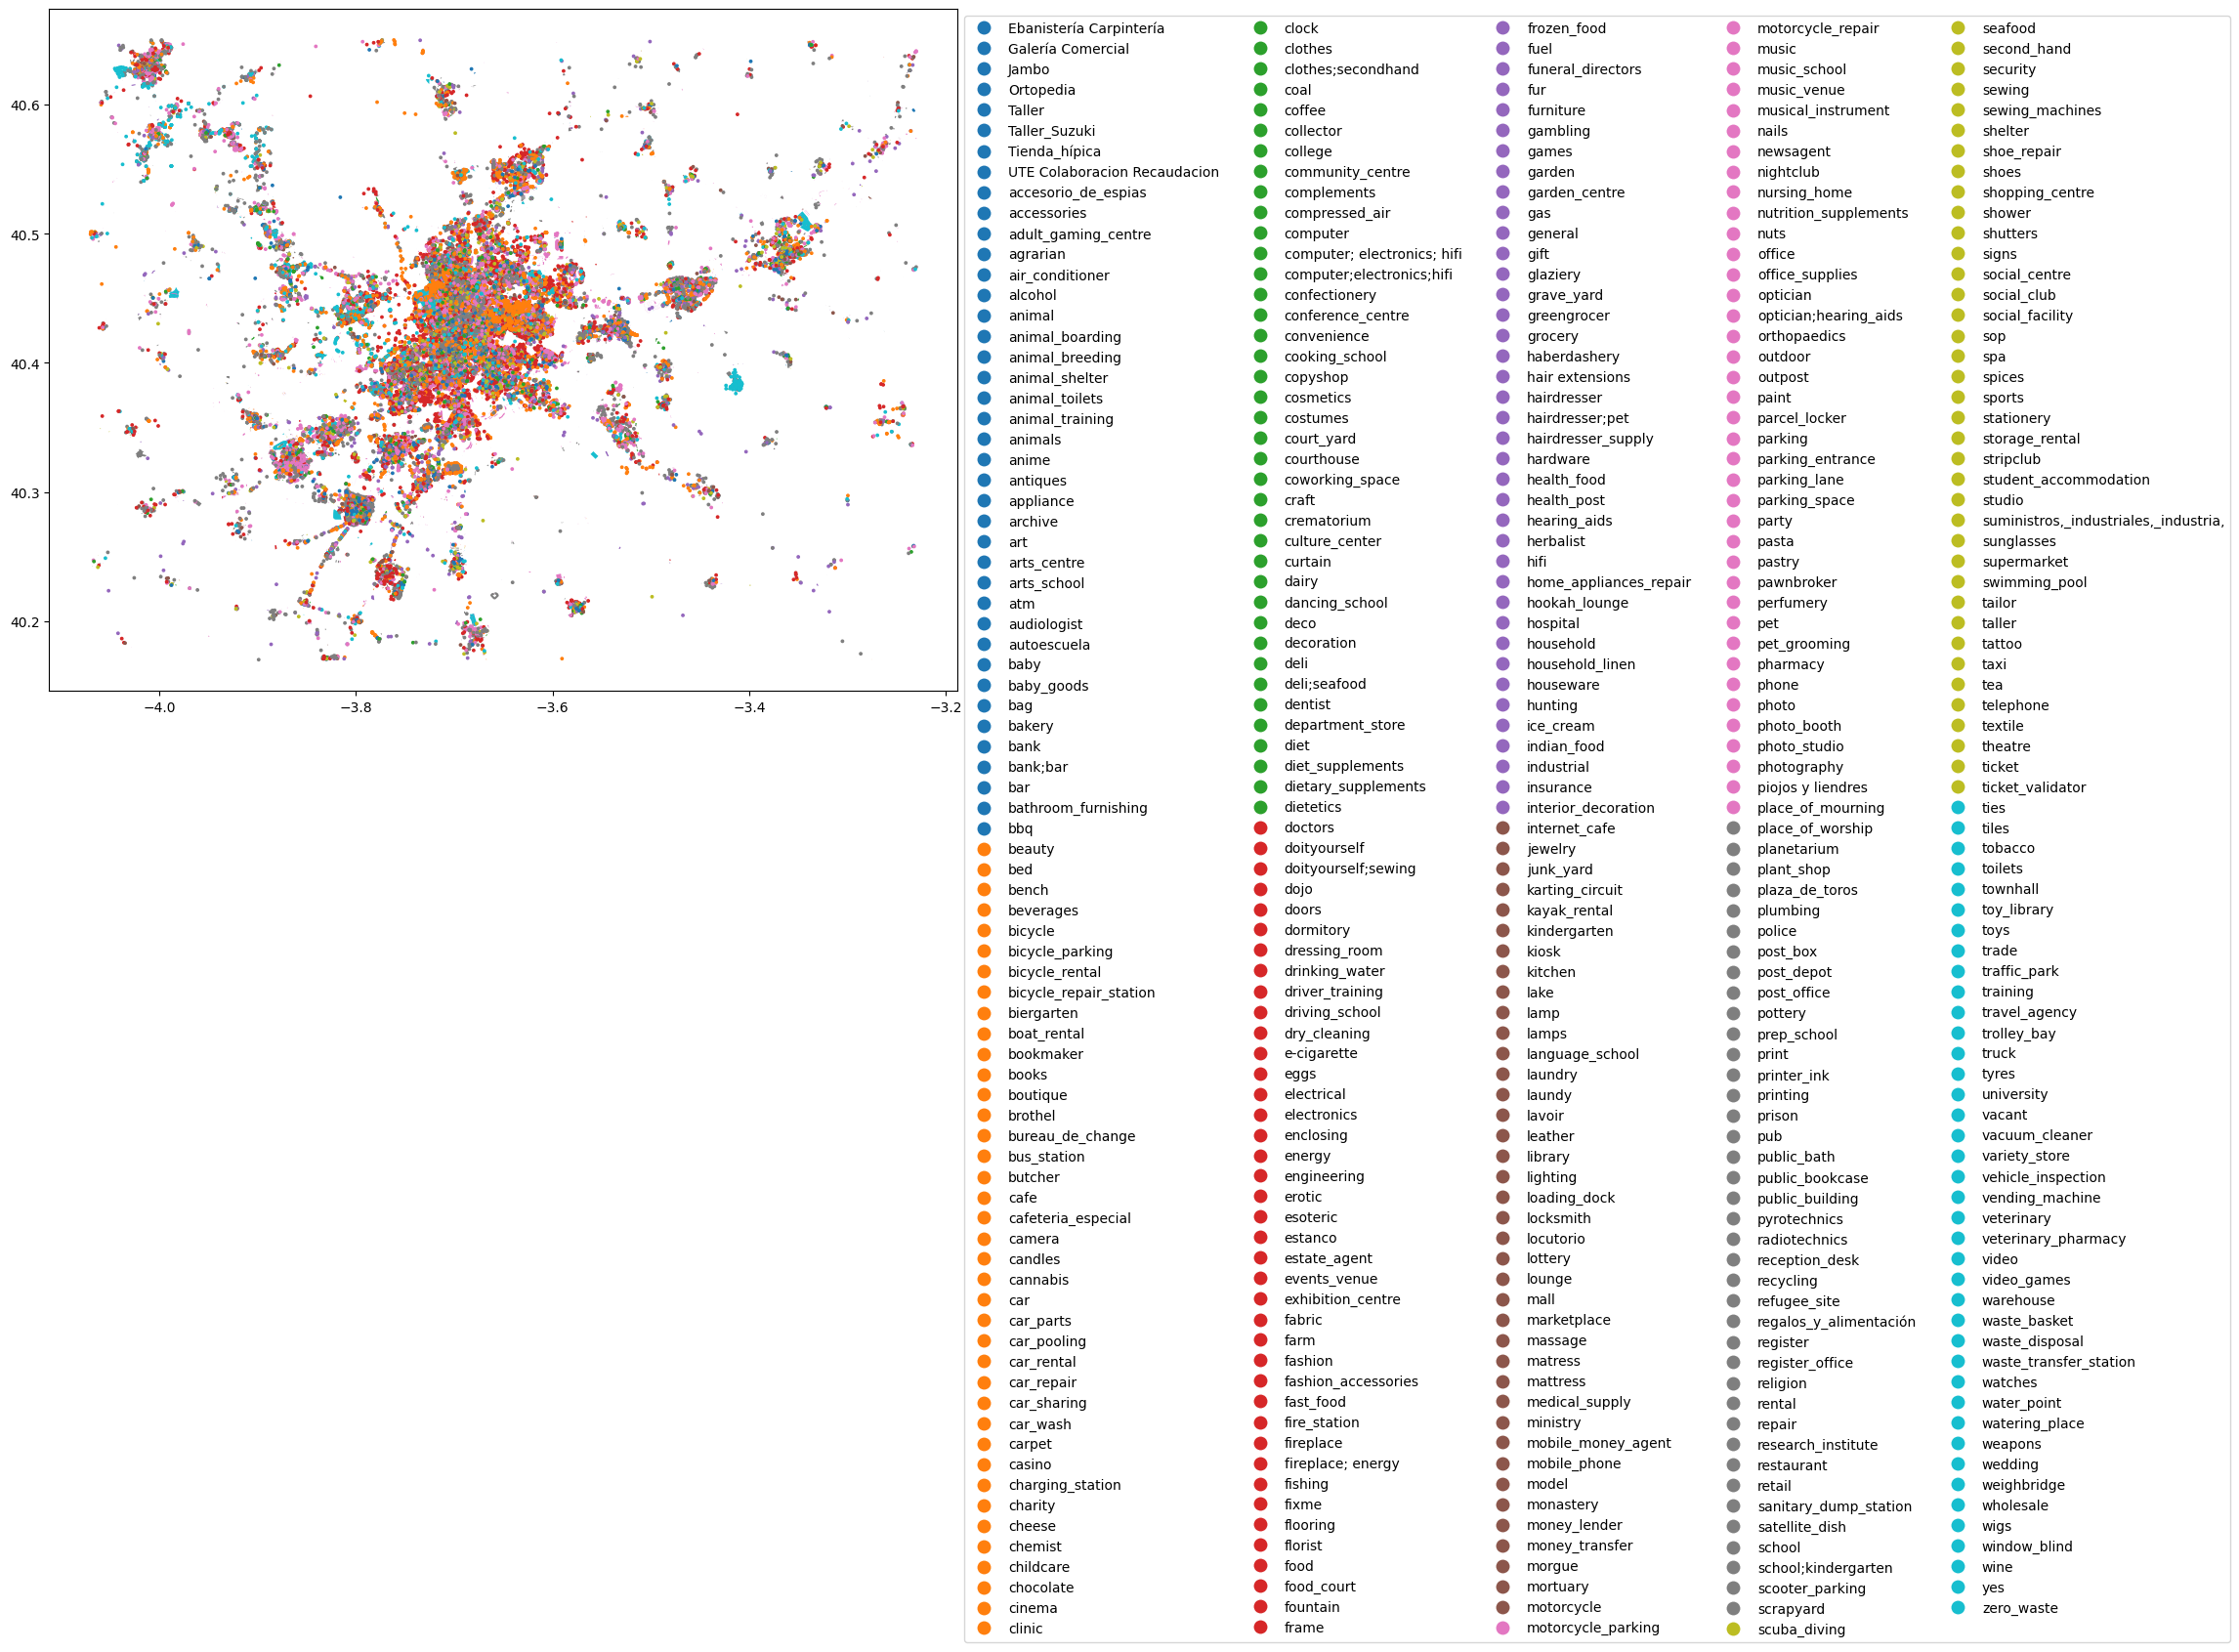

In [3]:
from pyrosm import OSM

# Initialize the OSM parser object
osm = OSM(fp)

# Read POIs such as amenities and shops
# =====================================

# By default pyrosm reads all elements having "amenity", "shop" or "tourism" tag
# Here, let's read only "amenity" and "shop" by applying a custom filter that
# overrides the default filtering mechanism
custom_filter = {'amenity': True, "shop": True}
pois = osm.get_pois(custom_filter=custom_filter)

# Gather info about POI type (combines the tag info from "amenity" and "shop")
pois["poi_type"] = pois["amenity"]
pois["poi_type"] = pois["poi_type"].fillna(pois["shop"])

# Plot
ax = pois.plot(column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))

In [4]:
from pyrosm.config import Conf
print("All available OSM keys", Conf.tags.available)

All available OSM keys ['aerialway', 'aeroway', 'amenity', 'boundary', 'building', 'craft', 'emergency', 'geological', 'highway', 'historic', 'landuse', 'leisure', 'natural', 'office', 'power', 'public_transport', 'railway', 'route', 'place', 'shop', 'tourism', 'waterway']


2. Pintar hospitales y farmacias sobre un mapa.

In [7]:
# filter by hospital and drugstores
health_filter = {'amenity': ['hospital', 'pharmasy']}
poisH = osm.get_pois(custom_filter=health_filter)

# Gather info about POI type (combines the tag info from "hospital" and "drugstore")
poisH["poi_type"] = poisH["amenity"]
poisH["poi_type"] = poisH["poi_type"].fillna(poisH["hospital"])
#poisH["pharmasy"]

# Plot
axH = poisH.plot(
    column='poi_type',
    markersize=3,
    figsize=(12,12),
    legend=True,
    legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1))
)

/home/milagros/Documents/UE/BI/GIS_Act1/venv/lib/python3.10/site-packages/pyrosm/pyrosm.py:576: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_poi_data(
/home/milagros/Documents/UE/BI/GIS_Act1/venv/lib/python3.10/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


KeyError: 'hospital'

In [8]:
# Define the tags for hospitals and drugstores
hospital_tags = {"amenity": "hospital"}
pharmasy_tags = {"amenity": "pharmasy"}

# Get all the hospitals and drugstores in the area
hospital = osm.get_pois(tags=hospital_tags)
pharmasy = osm.get_pois(tags=pharmasy_tags)

# Plot
axH = pois.plot(
    column='poi_type',
    markersize=3,
    figsize=(12,12),
    legend=True,
    legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1))
)

TypeError: OSM.get_pois() got an unexpected keyword argument 'tags'

3. Calcular, para cada hospital, la distancia a la farmacia más cercana.

4. Calcular, para cada hospital, cuántas farmacias se encuentran en menos de 150m